# Análise Exploratória de Dados (EDA) da Cerreira Fosta Ltda.

## Descrição do Cenário:
A Cerreira *Fosta* Ltda. é uma empresa especializada em produtos para o lar, como móveis, eletrodomésticos e artigos de decoração. Apesar de contar com uma base de clientes sólida e uma equipe de vendas dedicada, a empresa está enfrentando dificuldades para alcançar suas metas de vendas.

A taxa de conversão de oportunidades em vendas finalizadas está aquém do esperado, e o portfólio de produtos precisa ser otimizado para maximizar o valor das transações.

Recentemente, a CerreiraFosta Ltda. coletou uma grande quantidade de dados sobre seus clientes, suas compras e o seu histórico de vendas. A liderança da empresa acredita que, com uma análise detalhada desses dados, será possível identificar padrões e tendências que possam ajudar a melhorar o desempenho de vendas e orientar estratégias mais eficazes.

## Problema a Ser Resolvido:
1. Quais características estão relacionadas ao sucesso das vendas?
2. Como a concorrência interfere no desempenho da empresa?
3. Existem fatores específicos que indicam que uma oportunidade tem maior chance de ser fechada?
4. O que pode ser feito para otimizar as vendas?



### Primeiramente, vamos Conhecer as bases fornecidas pela Cerreira Fosta *Ltda*.
Vamos começar uma pequena análise examinando cada um dos conjuntos de dados. O objetivo é obter um conhecimento inicial dos dados para identificar e tratar os possíveis problemas, como registros duplicados e dados nulos, pois ambos prejudicam a Análise Exploratória dos Dados que vai ser feita mais pra frente.

In [ ]:
# Importando as bibliotecas que serão usadas na análise.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Acessando o Drive que contém as bases de dados.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho completo dos arquivos
path_train = "/content/drive/MyDrive/Pasta_PTA/Train.csv"
path_store = "/content/drive/MyDrive/Pasta_PTA/Store.csv"

# Carregar as bases de dados
train_df = pd.read_csv(path_train)
store_df = pd.read_csv(path_store)

<ipython-input-181-3623ac76fbd0>:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(path_train)


In [ ]:
# Verificando a base de dados "Store.csv".
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Verificando a base de dados "Train.csv".
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


## Contexto Bases de Dados
A Cerreira Fosta Ltda. nos forneceu duas bases de dados que serão extremamente importante para a resolução dos problemas que foram apontados pela empresa.

### 1. Base de dados: Store.csv

Essa base contém características fixas de cada loja pertencente à CerreiraFosta Ltda. São dados que descrevem atributos estruturais e comerciais das lojas, como localização, tipo, sortimento de produtos e proximidade com concorrentes.

### 2. Base de dados: Train.csv

Essa base contém dados operacionais que descrevem as vendas diárias de várias lojas pertencentes à CerreiraFosta Ltda. É o conjunto principal que mostra o desempenho de vendas ao longo do tempo, dia após dia, e inclui informações relacionadas a promoções, feriados e eventos escolares que podem impactar as vendas.

# Verificação dos tipos de dados
Após entendermos o contexto do projeto, será importante aprofundar na análise dos tipos de dados de cada variável. O objetivo dessa etapa é verificar se os dados estão categorizados corretamente, como numéricos, categóricos ou textuais, e identificar possíveis incongruências, como valores fora do padrão esperado, tipos incorretos ou dados ausentes.

Essa verificação permitirá corrigir inconsistências por meio de conversões ou padronizações necessárias, garantindo que os dados estejam adequados para as próximas etapas de análise. Essa etapa é fundamental para evitar erros futuros e assegurar a qualidade da Análise Exploratória dos Dados (EDA).

## Base Store.csv

- Primeiro, vamos verificar quais colunas existem na base "Store.csv" e quais os tipos de dado que o Pandas mostra que estas colunas possuem.



In [ ]:
# Verificando informações
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


## Dicionário dos Dados (Store)
- Store: Identificação única da loja.
- StoreType: Tipo da loja.
- Assortment: Tipo de sortimento oferecido pela loja.
- CompetitionDistance: Distância para a concorrência mais próxima, em metros.
- CompetitionOpenSinceMonth: Mês em que a concorrência mais próxima foi inaugurada.
- CompetitionOpenSinceYear: Ano em que a concorrência mais próxima foi inaugurada.
- Promo2: Indicador de participação da loja em promoções contínuas.
- Promo2SinceWeek: Semana do ano em que a loja começou a participar da promoção contínua.
- Promo2SinceYear: Ano em que a loja começou a participar da promoção contínua.
- PromoInterval: Meses em que a promoção contínua está ativa.

De acordo com as informações, podemos perceber que as colunas "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek" e "Promo2SinceYear" estão com o tipo de coluna float64, porém, o tipo adequado seria int64.

Portanto, vamos atualizar estes tipos de colunas.

In [ ]:
# Apresentação de um resumo estatístico do Dataframe.
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


Os dados numéricos, a primeiro momento, parecem estar dentro do esperado. Com uma análise mais profunda conseguiremos perceber possíveis outliers ou valores fora do padrão.

- **Observação**: as colunas ["CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"] possuem valores nulos.
 - Isto faz com que ao usar a função value_counts() nessas colunas em específico, venha menos ocorrências do que o esperado.

Vamos analisar as informações sobre os tipos de cada coluna da base de dados em questão

### Coluna "CompetitionOpenSinceMonth"
Agora, vamos analisar a variável **"CompetitionOpenSinceMonth"** representa o mês em que o concorrente mais próximo iniciou suas operações.  


In [ ]:
# Checando os valores
store_df['CompetitionOpenSinceMonth'].value_counts()

,count
CompetitionOpenSinceMonth,
9.0,125
4.0,94
11.0,92
3.0,70
7.0,67
12.0,64
10.0,61
6.0,50
5.0,44


Atualmente, a coluna possui o tipo de dado **float64**, conforme indicado pela função info(). No entanto, isso não é condizente com o propósito da variável, que deveria apresentar números inteiros no intervalo de **1 a 12** para representar os meses (ou seja, o tipo ideal seria **int64**).

Essa inconsistência precisará ser corrigida para garantir a precisão dos dados.

In [ ]:
# Transformando valores da colunas "CompetitionOpenSinceMonth" utilizando pd.to_numeric()
store_df['CompetitionOpenSinceMonth'] = pd.to_numeric(store_df['CompetitionOpenSinceMonth'], downcast='integer')

# Mostrando as informações das colunas
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Apesar da correção a coluna permancece com o tipo de float64 por causa da presença de valores Nan.

### Coluna "CompetitionOpenSinceYear"
A variável **"CompetitionOpenSinceYear"** indica o ano em que o concorrente mais próximo iniciou suas operações.

Agora, vamos analisar essa coluna para verificar sua consistência e adequação aos dados propostos.

In [ ]:
# Checando os valores que a coluna possui
store_df['CompetitionOpenSinceYear'].value_counts()

,count
CompetitionOpenSinceYear,
2013.0,83
2012.0,82
2014.0,70
2005.0,62
2010.0,55
2008.0,54
2009.0,54
2011.0,54
2007.0,48


Atualmente, a coluna possui o tipo de dado **float64**, conforme indicado pela função info(). No entanto, isso não é condizente com o propósito da variável, que deveria apresentar números inteiros representando anos.

Essa inconsistência precisará ser corrigida para garantir a precisão e a confiabilidade dos dados.

In [ ]:
# Transformando valores da colunas "CompetitionOpenSinceYear" utilizando pd.to_numeric()
store_df['CompetitionOpenSinceYear'] = pd.to_numeric(store_df['CompetitionOpenSinceYear'], downcast='integer')


# Mostrando as informações das colunas
store_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Coluna "Promo2SinceWeek"
A variável **"Promo2SinceWeek"** indica a semana do ano em que uma promoção contínua (**Promo2**) começou para cada loja.  

Agora, vamos analisar essa coluna para verificar sua consistência e adequação aos dados propostos.

In [ ]:
# Checando os valores que a coluna possui
store_df['Promo2SinceWeek'].value_counts()


,count
Promo2SinceWeek,
14.0,81
40.0,77
31.0,44
10.0,42
5.0,39
1.0,35
37.0,35
13.0,34
45.0,34


Atualmente, a coluna possui o tipo de dado **float64**, conforme indicado pela função info(). No entanto, isso não está condizente com o propósito da variável, que deveria apresentar números inteiros representando semanas do ano (ou seja, o tipo ideal seria **int64**).

Essa inconsistência precisará ser corrigida para garantir a precisão e a confiabilidade dos dados.

In [ ]:
# Transformando valores da colunas "Promo2SinceWeek" utilizando pd.to_numeric()
store_df['Promo2SinceWeek'] = pd.to_numeric(store_df['Promo2SinceWeek'])

# Mostrando as informações das colunas
store_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Coluna "Promo2SinceYear"
A variável **"Promo2SinceYear"** indica o ano em que uma promoção contínua (**Promo2**) começou para cada loja.  

Agora, vamos analisar essa coluna para verificar sua consistência e adequação aos dados propostos.

In [ ]:
# Checando os diferentes valores que a coluna possui
store_df['Promo2SinceYear'].value_counts()

,count
Promo2SinceYear,
2011.0,128
2013.0,120
2014.0,95
2012.0,81
2009.0,73
2010.0,64
2015.0,10


Atualmente, a coluna possui o tipo de dado **float64**, conforme indicado pela função info(). No entanto, isso não está condizente com o propósito da variável, que deveria apresentar números inteiros representando anos (ou seja, o tipo ideal seria **int64**).

Essa inconsistência precisará ser corrigida para garantir a precisão e a confiabilidade dos dados.

In [ ]:
# Transformando valores da colunas "Promo2SinceYear" utilizando pd.to_numeric()
store_df['Promo2SinceYear'] = pd.to_numeric(store_df['Promo2SinceYear'])


# Mostrando as informações das colunas
store_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Conclusão

A análise dos tipos de variáveis da base de dados **store.csv** permitiu verificar a consistência entre os valores presentes e o propósito de cada coluna. Identificamos variáveis com tipos corretos, como **Store** e **Promo2**, mas também algumas inconsistências, como nas colunas **CompetitionOpenSinceMonth**, **CompetitionOpenSinceYear**, **Promo2SinceWeek**, e **Promo2SinceYear**, que precisaram ser ajustadas para garantir maior precisão nas análises futuras.

Com essa etapa concluída, podemos assegurar que a base **store.csv** foi devidamente explorada e está parcialmente preparada para ser utilizada em conjunto com outras bases de dados. Agora, avançaremos para a exploração inicial da base **train.csv**, com foco na análise de suas variáveis e na identificação de possíveis padrões ou inconsistências.

## Base Train.csv

- Primeiro, vamos verificar quais colunas existem na base "train.csv" e quais os tipos de dado que o Pandas mostra que elas colunas possuem.



In [ ]:
# Mostrando as informações das colunas
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


## Dicionário dos Dados (Train)
- Store: Identificação exclusiva de cada loja.
- DayOfWeek: Representa o dia da semana
- Date: Data específica no formato AAAA-MM-DD.
- Sales: Volume de vendas realizado em um determinado dia.
- Customers: Número de clientes atendidos em um determinado dia.
- Open: Indicador de abertura da loja no dia correspondente .
- Promo: Indicador de realização de promoção na loja naquele dia.
- StateHoliday: Indica se o dia corresponde a um feriado estadual.
- SchoolHoliday: Indicador de impacto do fechamento de escolas no dia específico.

De acordo com as informações, podemos perceber que a coluna "Date" possui o tipo de dado object porém o tipo correto seria o tipo de datetime. Além disso, vamos analisar a coluna "StateHoliday" pois um dos valores presentes na coluna é o 0 no formato de string, vamos analisar se na coluna há o valor 0 no formato de int.

Portanto, vamos atualizar estes tipos de colunas.

### Coluna "Date"
A variável "Date" representa uma data no formato AAAA-MM-DD.

In [ ]:
# checando os diferentes valores na coluna "Date"
train_df['Date'].value_counts()

,count
Date,
2015-07-31,1115
2013-11-06,1115
2013-11-18,1115
2013-11-17,1115
2013-11-16,1115
...,...
2014-10-28,935
2014-10-27,935
2014-10-26,935


Atualmente, a coluna possui o tipo de dado **object**, conforme indicado pela função info(). No entanto, isso não é condizente com o propósito da variável, que deveria apresentar datas do ano representadas pelo tipo específico de datas **datetime**.

Essa inconsistência precisará ser corrigida para garantir a precisão e a confiabilidade dos dados.

In [ ]:
# Transformando valores da colunas "Date" utilizando pd.to_datetime()
# lendo a data no formato: AAAA-MM-DD
train_df['Date'] = pd.to_datetime(train_df['Date'], format='%Y-%m-%d')

# Mostrando as informações das colunas
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


### Coluna "StateHoliday"
A variável "StateHoliday" indica se estava ocorrendo algum tipo de feriado estadual em um determinado dia.

In [ ]:
# checando os diferentes valores na coluna "StateHoliday"
train_df['StateHoliday'].value_counts()

,count
StateHoliday,
0,855087
0,131072
a,20260
b,6690
c,4100


A coluna sugere apenas valores do tipo **object**, mas um de seus valores consiste no 0 que está no formato de **int64**, ou seja, a mesma coluna possui dois tipos diferentes de dado.
Por isso, vamos corrigir os valores da tabela e padronizar para object.

In [ ]:
# usando a função apply() para aplicar a função lambda (que converte o elemento x para string)
# para cada elemento da coluna "StateHoliday"
train_df['StateHoliday'] = train_df['StateHoliday'].apply(lambda x: str(x).strip())

# checando se os valores estão condizentes com o propósito da coluna
train_df['StateHoliday'].value_counts()

,count
StateHoliday,
0,986159
a,20260
b,6690
c,4100


In [ ]:
# Mostrando as informações das colunas
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


### Conclusão

A análise dos tipos de variáveis da base de dados **train.csv** permitiu verificar a consistência entre os valores presentes e o propósito de cada coluna. Identificamos variáveis com tipos corretos, como **Store**, **DayOfWeek**, **Sales**, **Customers**, **Open**, **Promo** e **SchoolHoliday**, mas também algumas inconsistências, como nas colunas **Date** e **StateHoliday**, que precisaram ser ajustadas para garantir maior precisão nas análises futuras.

Com essa etapa concluída, podemos assegurar que a base **train.csv** foi devidamente explorada e está parcialmente preparada para ser utilizada em conjunto com outras bases de dados. Agora, avançaremos para a etapa de tratamento de dados nulos.

# Tratamento de Dados Nulos

Agora, vamos iniciar o tratamento das ocorrências nulas nas tabelas de "Store.csv" e "Train.csv".

## Base de dados "Store.csv"
Vamos iniciar o tratamento com a base de dados **"Store"**, pois ela é **consideravelmente menor** em comparação com a outra base, o que facilita o processo de limpeza e análise.

In [ ]:
# Verificando possíveis dados duplicados
store_df[store_df.duplicated()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


Como mostrado na celula de cima, não existem dados duplicados. Isso é um bom sinal, pois uma das etapas do tratamento não será necessária.

In [ ]:
# Checando em quais colunas há a presença de dados nulos
store_df.isna().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


In [ ]:
# Verificando colunas específicas
store_df[store_df["CompetitionOpenSinceMonth"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# Verificando se existem linhas nulas
store_df[store_df["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


Durante a exploração dos valores nulos nas colunas CompetitionOpenSinceMonth e CompetitionOpenSinceYear, foi observado que os valores ausentes provavelmente indicam que a Cerreira Fosta Ltda. não possui informações sobre a data de abertura dos concorrentes. Esse padrão se torna evidente pelo fato de que, em quase todas as linhas onde essas colunas possuem valores nulos, a coluna CompetitionDistance está preenchida, exceto em 3 linhas específicas onde essas informações estão simultaneamente ausentes.

Essa discrepância sugere que, embora a distância dos concorrentes seja geralmente conhecida, as datas de abertura dessas lojas não foram registradas ou estão indisponíveis. Isso pode ser explicado pela falta de registro das informações no sistema.


É provável que os valores nulos na coluna CompetitionDistance estejam relacionados à ausência de informações sobre concorrentes próximos às unidades da Cerreira Fosta Ltda.. Por esse motivo, optamos por manter os valores nulos como estão, preservando a integridade dos dados originais e permitindo que a análise reflita a realidade sem inferências adicionais. Essa decisão garante que a ausência de concorrência próxima seja devidamente interpretada em análises futuras.

In [ ]:
# Verificando as ocorrências de valores nulos na coluna CompetitionDistance
store_df[store_df["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


Esses valores vão ser deixados nulos, pois é a forma que representa melhor a inexistência de concorrentes diretos.

In [ ]:
# Analisando os dados para entender as distribuições
median_year = store_df['CompetitionOpenSinceYear'].median()
mode_year = store_df['CompetitionOpenSinceYear'].mode()[0]

median_month = store_df['CompetitionOpenSinceMonth'].median()
mode_month = store_df['CompetitionOpenSinceMonth'].mode()[0]

print(f"Mediana do ano: {median_year}, Moda do ano: {mode_year}")
print(f"Mediana do mês: {median_month}, Moda do mês: {mode_month}")

Mediana do ano: 2010.0, Moda do ano: 2013.0
Mediana do mês: 8.0, Moda do mês: 9.0


A escolha de medidas como mediana e moda para substituir os valores ausentes nas colunas CompetitionOpenSinceMonth e CompetitionOpenSinceYear foi feita com base no comportamento dos dados e nas características específicas de cada variável:

CompetitionOpenSinceMonth (Moda):

- A moda foi escolhida para o mês porque ela reflete o valor mais frequente nos dados, sendo ideal para capturar o comportamento dominante das inaugurações.
- Como os meses têm um intervalo fixo (1 a 12), a moda oferece uma representação clara e confiável dos padrões de abertura registrados.

CompetitionOpenSinceYear (Mediana):

- A mediana foi escolhida para o ano porque ela representa o ponto central dos anos registrados, sendo menos influenciada por valores extremos (anos muito antigos ou futuros).


In [ ]:
# Calculando a moda de CompetitionOpenSinceMonth e a mediana de CompetitionOpenSinceYear
mode_month = store_df['CompetitionOpenSinceMonth'].mode()[0]  # Pegando o valor mais frequente
median_year = store_df['CompetitionOpenSinceYear'].median()

# Substituindo valores nulos por mediana e moda, respectivamente
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(mode_month)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(median_year)

# Redefinindo as linhas específicas como nulas
lines_to_reset = [290, 621, 878]
store_df.loc[lines_to_reset, ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']] = None

# Verificando as alterações
print(store_df.loc[lines_to_reset, ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']])

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear
290                        NaN                       NaN
621                        NaN                       NaN
878                        NaN                       NaN


In [ ]:
# Preenchendo os valores nulos nas colunas CompetitionOpenSinceMonth e CompetitionOpenSinceYear pela moda e mediana, respectivamente, nas linhas em que CompetitionDistance não é nula.
store_df.loc[store_df['CompetitionDistance'].notnull(), 'CompetitionOpenSinceMonth'] = store_df.loc[store_df['CompetitionDistance'].notnull(), 'CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0])
store_df.loc[store_df['CompetitionDistance'].notnull(), 'CompetitionOpenSinceYear'] = store_df.loc[store_df['CompetitionDistance'].notnull(), 'CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].median())


Os valores nulos nas colunas CompetitionOpenSinceMonth e CompetitionOpenSinceYear foram preenchidos de forma estratégica: a moda foi utilizada para a coluna CompetitionOpenSinceMonth, enquanto a mediana foi aplicada na coluna CompetitionOpenSinceYear, garantindo que os dados sejam representativos e consistentes com os padrões existentes.

Além disso, os valores nulos na coluna CompetitionDistance foram mantidos inalterados, refletindo a ausência de informações sobre concorrentes próximos às lojas, sem realizar suposições ou inferências que poderiam comprometer a integridade dos dado

In [ ]:
# Checando se as alterações foram devidamente alteradas
store_df.isna().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,3
CompetitionOpenSinceYear,3
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


Agora, precisamos explorar as colunas de "Promo2SinceWeek", "Promo2SinceYear" e "PromoInterval" a fim de entender as colunas e seus dados nulos.

In [ ]:
# Checando a base para entender as colunas de Promo2SinceWeek,	Promo2SinceYear	e PromoInterval
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Vamos checar se as colunas de "Promo2SinceWeek", "Promo2SinceYear" e "PromoInterval" possuem alguma relação no quesito de dados nulos.

In [ ]:
# Verificando os dados nulos das colunas simultaneamente
store_df[store_df['Promo2SinceWeek'].isnull() & store_df['Promo2SinceYear'].isnull() & store_df['PromoInterval'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,9.0,2010.0,0,NaN,NaN,NaN


De acordo com a exploração, as colunas de "Promo2SinceWeek", "Promo2SinceYear" e "PromoInterval" aparecem simultaneamente com dados nulos em 544 linhas.
Isso indica que estas três colunas estão intimamente conectadas no quesito de dados nulos, pois todas as ocorrências de dados faltantes destas colunas aparecem nas mesmas linhas.

A partir da análise da exploração, o preenchimento de dados nulos destas colunas deve ser feito de forma estratégica. Por isso, os métodos adotados foram os seguintes:  

PromoInterval (substituir por uma string):
- Foi escolhido substituir os dados faltantes pela string "Não existe o intervalo dos meses", a fim de delimitar que não há a ocorrência dos dados.

Promo2SinceWeek e Promo2SinceYear:
- Foi escolhido não preencher os dados nulas destas colunas.
- Além destas colunas possuírem quase metade de seus valores como nulos, temos que levar em consideração também o tipo de dado presente nelas.
- Neste caso, elas possuem o tipo **int64**, logo não seria bom no ponto de vista estatístico substituir as ocorrências nulas pela moda ou mediana por exemplo, que havíamos feito nas colunas de "CompetitionOpenSinceMonth" e "CompetitionOpenSinceYear", já que isso poderia afetar análises estatísticas futuras.
  - Além disso, caso substituíssemos as ocorrências nulas por 0 não faria sentido para a proposta dessas colunas, que retratam o ano e mês em que a loja concorrente mais próxima abriu a loja. Logo, não faria sentido substituir os valores nulos por 0.

In [ ]:
# Modificando as ocorrências nulas de PromoInterval pelo texto 'Não existe o intervalo dos meses'
store_df.fillna({'PromoInterval' : 'Não existe o intervalo dos meses'}, inplace=True)

# Checando novamente a base
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,Não existe o intervalo dos meses
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,Não existe o intervalo dos meses
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,Não existe o intervalo dos meses


Após os devidos tratamentos de dados nulos na base "Store.csv", vamos checar se nossos tratamentos foram devidamente atualizados e aplicados.

In [ ]:
# Verificando se todo o tratamento foi devidamente realizado
store_df.isna().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,3
CompetitionOpenSinceYear,3
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,0


Após tratarmos todas as colunas com valores nulos, o próximo passo é padronizar as variáveis do DataFrame "Store" para deixá-lo bem organizado e preparado para a Análise Exploratória de Dados (EDA).

Para garantir a integridade e a funcionalidade das análises futuras, iniciaremos a organização das variáveis categóricas e numéricas separadamente. Esse cuidado é essencial, pois uma das etapas na EDA é a criação de um gráfico de correlação, que compara exclusivamente as variáveis numéricas.

Portanto, a padronização das variáveis será realizada de forma a preservar os dados em seu formato original para cálculos estatísticos, enquanto tornamos os dados categóricos mais intuitivos e legíveis.


O primeiro passo na organização e padronização dos dados é ajustar a coluna Assortment, que descreve o nível de sortimento das lojas. Essa coluna originalmente utiliza rótulos categóricos representados por letras:

- a: Básico
- b: Extra
- c: Estendido

Para tornar os dados mais intuitivos e facilitar a interpretação durante a Análise Exploratória de Dados (EDA), substituímos os rótulos a, b e c por descrições completas (básico, extra, e estendido, respectivamente). Essa transformação melhora a legibilidade e consistência do conjunto de dados, especialmente para visualizações e análises qualitativas.

In [ ]:
# Renomeando o tipo de sortimento
rename_sortimento = {
    'a': 'Básico',
    'b': 'Extra',
    'c': 'Estendido'
}

# Atualizando o dataframe Store com a nova informação
store_df['Assortment'] = store_df['Assortment'].map(rename_sortimento)

# Verificando a coluna 'Assortment'
display((store_df['Assortment']))

,Assortment
0,Básico
1,Básico
2,Básico
3,Estendido
4,Básico
...,...
1110,Básico
1111,Estendido
1112,Estendido
1113,Estendido


A próxima etapa na organização e padronização da base de dados "store" será renomear os meses, passando de valores inteiros (1,2,3,...,12), para strings (Janeiro, Fevereiro, Março,..., Dezembro).

In [ ]:
# Renomeando os meses
rename_meses = {
    1: "Janeiro", 2: "Fevereiro", 3: "Março", 4: "Abril",
    5: "Maio", 6: "Junho", 7: "Julho", 8: "Agosto",
    9: "Setembro", 10: "Outubro", 11: "Novembro", 12: "Dezembro"
}

# Atualizando a coluna CompetitionOpenSinceMonth com as novas informações
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0).astype(int).map(rename_meses)


# Verificando a coluna CompetitionOpenSinceMonth
display(store_df['CompetitionOpenSinceMonth'])

,CompetitionOpenSinceMonth
0,Setembro
1,Novembro
2,Dezembro
3,Setembro
4,Abril
...,...
1110,Junho
1111,Abril
1112,Setembro
1113,Setembro


Após finalizar o tratamento da única coluna categórica que necessitava organização, concluímos todas as etapas de tratamento, organização e padronização da base de dados "Store". Agora, os dados estão devidamente estruturados, consistentes e prontos para serem utilizados em análises futuras, como a Análise Exploratória de Dados (EDA) e etapas subsequentes do projeto.

Com a base "Store" finalizada, passaremos à próxima etapa, que envolve a exploração inicial e o tratamento da segunda base fornecida pela Cerreira Fosta Ltda., a base de dados "Train". Essa nova base será preparada para garantir a integração eficiente entre os conjuntos de dados e permitir uma análise mais completa e detalhada.

## Base de dados "Train.csv"

Vamos fazer uma exploração inicial e o tratamento e organização dos dados da segunda base fornecida pela Cerreira Fosta Ltda. a base de dados "Train".

Só relembrando, a base "Train" contém dados operacionais que descrevem as vendas diárias de várias lojas pertencentes à CerreiraFosta Ltda. . É o conjunto principal que mostra o desempenho de vendas ao longo do tempo, dia após dia, e inclui informações relacionadas a promoções, feriados e eventos escolares que podem impactar as vendas.

In [ ]:
# Verificando a base de dados Train
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Verificando a base de dados Train
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Verificando possíveis dados duplicados
train_df[train_df.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


Como mostrado na celula de cima, não existem dados duplicados. Isso é um bom sinal, pois uma das etapas do tratamento não será necessária.

Vamos checar se há valores nulos na segunda base de dados fornecida pela Cerreira Fosta Ltda. (Train) .

In [ ]:
# Checando as ocorrências nulas na base de dados "Train.csv"
train_df.isna().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


Como mostrado na célula anterior, não existem dados nulos em nenhuma das colunas da base de dados "Train". Isso é um excelente sinal, pois elimina a necessidade de tratar valores ausentes, agilizando o processo de organização.

O próximo passo será organizar algumas colunas para torná-las mais intuitivas e de fácil interpretação durante a Análise Exploratória de Dados (EDA). Primeiramente, ajustaremos as variáveis categóricas, substituindo rótulos numéricos ou abreviados por descrições mais claras. Em seguida, trataremos as variáveis numéricas, preservando seu formato original para facilitar cálculos e análises estatísticas.

Essa separação é importante, pois uma das etapas essenciais na EDA é a criação de gráficos de correlação, que comparam exclusivamente as variáveis numéricas, fornecendo insights valiosos sobre as relações entre elas.

Agora, iremos padronizar a coluna StateHoliday, que indica os feriados estaduais. Atualmente, essa coluna utiliza rótulos categóricos para identificar os tipos de feriados:

- a: Feriado geral.
- b: Feriado de Páscoa.
- c: Natal.
- 0: Nenhum.

In [ ]:
# Garantindo que todos os valores na coluna 'StateHoliday' sejam strings
train_df['StateHoliday'] = train_df['StateHoliday'].astype(str)

# Mapeando os valores para descrições mais claras
rename_feriados_estaduais = {
    'a': 'Feriado Geral',
    'b': 'Feriado de Páscoa',
    'c': 'Natal',
    '0': 'Sem Feriado'
}

train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


Vamos passar para string os dias da semana. A coluna DayOfWeek, que atualmente utiliza números (1 = segunda-feira, ..., 7 = domingo), será convertida para valores textuais mais descritivos, como "segunda-feira", "terça-feira", e assim por diante.

In [ ]:
# Renomeando os valores de dias da semana para strings descritivas
rename_dias = {
    1: 'Segunda-Feira',
    2: 'Terça-Feira',
    3: 'Quarta-Feira',
    4: 'Quinta-Feira',
    5: 'Sexta-Feira',
    6: 'Sábado',
    7: 'Domingo'
}

# Atualizando a coluna 'DayOfWeek'
train_df['DayOfWeek'] = train_df['DayOfWeek'].map(rename_dias)

# Verificando a coluna 'DayOfWeek'
display((train_df['DayOfWeek']))

,DayOfWeek
0,Sexta-Feira
1,Sexta-Feira
2,Sexta-Feira
3,Sexta-Feira
4,Sexta-Feira
...,...
1017204,Terça-Feira
1017205,Terça-Feira
1017206,Terça-Feira
1017207,Terça-Feira


Concluímos o tratamento e a padronização da segunda base de dados fornecida pela Cerreira Fosta Ltda., a base "Train". Todas as colunas foram organizadas e transformadas para melhorar a clareza e facilitar a análise, garantindo que ambas as bases de dados estejam consistentes e prontas para serem utilizadas.

Agora, o próximo passo é realizar o merge entre as bases "Store" e "Train". Isso será feito utilizando a coluna Store, que é comum a ambas as bases e representa o identificador único de cada loja.

Essa união combinará as informações operacionais e de vendas (da base "Train") com os dados detalhados sobre as características das lojas (da base "Store"), permitindo uma análise mais completa e integrada.

# Verificação e Remoção de Outliers
Nesta etapa, vamos verificar quais são os valores mais distoantes de cada coluna e a partir disso resolver de qual modo vamos tratá-los.

## Elaboração de funções de verificação de outliers

Vamos criar uma função mais voltada para analisar outliers das colunas numéricas.

In [ ]:
def analisar_outliers_numericos(dataframe, coluna):
  # Primeiro Quartil
  Q1 = dataframe[coluna].quantile(0.25)

  # Terceiro Quartil
  Q3 = dataframe[coluna].quantile(0.75)

  # intervalo interquartil
  IQR = Q3 - Q1

  # definindo o limite inferior do boxplot
  limite_inferior = Q1 - 1.5 * IQR

  # definindo o limite superior do boxplot
  limite_superior = Q3 + 1.5 * IQR

  # guardando em uma variável as ocorrências consideradas como outliers em modo crescente
  outliers = np.sort(dataframe[(dataframe[coluna] < limite_inferior) | (dataframe[coluna] > limite_superior)][coluna].unique())

  # retornando os outliers
  return outliers

Além disso, vamos criar uma função que pode imprimir outliers com a melhor visualização para análises de outliers.

In [ ]:
def imprimir_outliers(funcao_analise, dataframe, colunas):
  for col in colunas:
      print(f"Outliers da coluna {col}: \n")

      # guardando os outliers em uma variavel
      outliers = funcao_analise(dataframe, col)

      # criando uma variavel de contagem
      i = 0

      for out in outliers:
        # printando cada elemento separado por uma vírgula
        print(out, end=', ')

        # incrementando a contagem
        i += 1

        # quando há 10 elementos em uma linha criamos uma nova linha para
        # melhorar a visualização
        if i == 10:
          print('')

          # reiniciando a contagem
          i = 0

      # quebrando a linha para melhorar a visualização
      print('\n')

## Store.csv

Vamos checar quais dados são mais distoantes dentro da base de dados "Store.csv" utilizando o método describe().

In [ ]:
# vendo análises estatísticas das colunas
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,1112.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,2009.089029,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,5.161844,0.500078,14.141984,1.674935
min,1.00000,20.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,2008.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,2011.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,2015.000000,1.000000,50.000000,2015.000000


Com a função describe(), conseguimos obter algumas informações importantes, dentre estas informações estão o desvio-padrão, média, valor máximo e mínimo e informações sobre os quartis de cada coluna numérica.

Alguns outliers que podemos ir mais a fundo estão explicitados com a função describe().

Percebe-se que o valor mínimo da coluna "CompetitionOpenSinceYear" é o ano de 1900, o que é algo extremamente improvável.

Outra coluna que chama a atenção é a coluna de "CompetitionDistance", ao qual o valor máximo desta coluna é de 75860, ou seja, a loja concorrente mais próxima está num raio de 75860 quilômetros. Esta valor pode estar correto, mas pode não ser um valor tão útil de se trabalhar.

As outras colunas possuem resultados esperados. A coluna de "Store" possui todos os valores de 1 à 1115, a coluna "CompetitionOpenSinceMonth" possui como valor mínimo 1 e valor máximo 12, a coluna "Promo2" possui apenas os valores 0 e 1 e a coluna "Promo2SinceYear" também possui valores condizentes com a proposta.

Com esta análise inicial, vamos analisar mais a fundo as colunas numéricas de "CompetitionDistance" e "CompetitionOpenSinceYear" além de analisar também as colunas categóricas da base de dados "Store.csv"

In [ ]:
# separando as colunas as quais iremos analisar os outliers
store_numeric = store_df.select_dtypes(include=['int64', 'float64']).columns
store_categ = store_df.select_dtypes(include=['object']).columns

### Colunas Numéricas

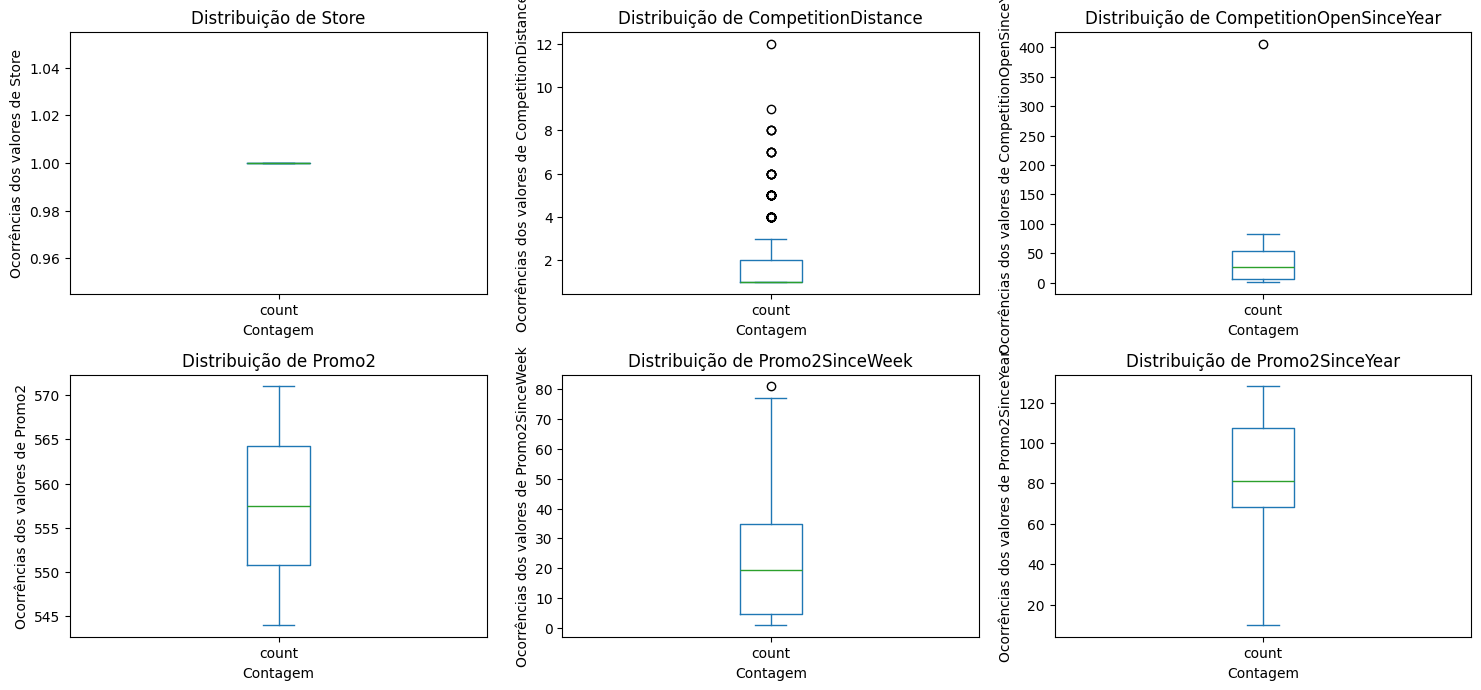

In [ ]:
# fazendo gráficos boxplots para analisar outliers numéticos

plt.figure(figsize=(15, 10))
for i, column in enumerate(store_numeric, 1):
    plt.subplot(3, 3, i)
    store_df[column].value_counts().plot(kind='box')
    plt.title(f'Distribuição de {column}')
    plt.xlabel('Contagem')
    plt.ylabel(f'Ocorrências dos valores de {column}')

plt.subplots_adjust(wspace=0.5, hspace=1)
plt.tight_layout()
plt.show()

A partir dos gráficos, podemos obter algumas análises.

Como esperado, de acordo com o gráfico de caixa a coluna "Store" possui apenas uma ocorrência para cada valor presente na coluna.

O gráfico de caixa relacionado à coluna "CompetitionDistance" aponta que a maioria dos dados estão concentrados na caixa mas existem alguns valores que estão acima do limite superior da caixa, apontando que existem distâncias muito altas do que o padrão. Isto já poderia ter sido observado quando analisamos o describe() da base de dados.

Já o gráfico de caixa relacionado à coluna "CompetitionOpenSinceYear" também aponta que a maioria dos dados estão concentrados dentro da caixa. No gráfico é possível perceber também que existem valores muito acima do limite superior da caixa, o que pode indicar que há uma loja concorrente aberta há muitos anos ou mais provavelmente um dado inválido.

A coluna "Promo2" indica que as ocorrências que os dados apresentam uma grande variabilidade de valores, o que faz sentido com o contexto da coluna que possui apenas valores de 0 e 1.

A partir do gráfico de caixa da coluna "Promo2SinceWeek" podemos concluir que a coluna possui uma grande variabilidade dos valores e também a presença de outliers superiores que vão ser analisados posteriormente.

O gráfico de caixa da coluna "Promo2SinceYear" apresenta uma alta dispersão dos dados e não apresenta outliers significativos.

Com esta análise dos gráficos, agora vamos analisar quais foram os outliers identificados pelo método interquartil.

In [ ]:
imprimir_outliers(analisar_outliers_numericos, store_df, store_numeric)

Outliers da coluna Store: 



Outliers da coluna CompetitionDistance: 

16180.0, 16210.0, 16240.0, 16350.0, 16420.0, 16490.0, 16570.0, 16680.0, 16690.0, 16760.0, 
16970.0, 16990.0, 17080.0, 17110.0, 17280.0, 17290.0, 17340.0, 17410.0, 17500.0, 17540.0, 
17570.0, 17650.0, 17930.0, 18010.0, 18020.0, 18050.0, 18160.0, 18370.0, 18540.0, 18610.0, 
18620.0, 18640.0, 18650.0, 18660.0, 18670.0, 18710.0, 18760.0, 19360.0, 19370.0, 19640.0, 
19700.0, 19780.0, 19830.0, 19840.0, 19960.0, 20050.0, 20260.0, 20390.0, 20620.0, 20640.0, 
20930.0, 20970.0, 21370.0, 21770.0, 21790.0, 21810.0, 21930.0, 22330.0, 22350.0, 22390.0, 
22440.0, 22490.0, 22560.0, 23130.0, 23620.0, 24000.0, 24530.0, 24770.0, 25360.0, 25430.0, 
26130.0, 26450.0, 26490.0, 26990.0, 27150.0, 27190.0, 27530.0, 27650.0, 29070.0, 29190.0, 
29910.0, 30030.0, 30360.0, 31830.0, 32240.0, 32330.0, 33060.0, 34050.0, 35280.0, 36410.0, 
38630.0, 38710.0, 40540.0, 40860.0, 44320.0, 45740.0, 46590.0, 48330.0, 58260.0, 75860.0, 


Outliers da colu

Podemos perceber que nas colunas "Store", "Promo2", "Promo2SinceWeek" e "Promo2SinceYear" não foram identificados outliers utilizando o método interquartil.

Analisando os outliers da coluna de "CompetitionOpenSinceYear", podemos notar que há valores de 1990 até 2003 que foram apontados como outliers mas que eles podem ser facilmente valores verídicos. Entretanto, há dois valores que são 1900 e 1961 que são extremamente difíceis de acreditar que sejam realmente valores reais, por isso devemos tratá-los.

Analisando os outliers da coluna "CompetitionDistance", podemos checar que estes são muito variados. Apesar de possuírem alguns valores mais distoante (como 75860), não podemos afirmar com propriedade que estes valores estão incorretos, pois isto pode ser apenas um indentificador de que não há concorrentes por perto.

Por isso, os métodos que iremos utilizar serão os seguintes:
1. Coluna "CompetitionOpenSinceYear":
- Iremos trocar os outliers pela mediana, acreditamos que esta é a melhor abordagem pois não afeta análises estatística e afins.

2. Coluna "CompetitionDistance":
- Iremos optar por deixar os valores identificados como outliers, pois estes valores mais distoantes são críveis e podem apenas ser um identificador que a unidade não é afetada pela concorrência.

In [ ]:
# guardando os outliers da coluna "CompetitionOpenSinceYear" em uma variável
outliers = analisar_outliers_numericos(store_df, 'CompetitionOpenSinceYear')

# guardando a mediana da coluna "CompetitionOpenSinceYear"
mediana_concorrencia = store_df['CompetitionOpenSinceYear'].median()

# usando o apply() para modificar os outliers pela mediana
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].apply(lambda x: mediana_concorrencia if x in outliers else x)

Agora, vamos checar se os outliers foram devidamente removidos.

In [ ]:
# essa checagem é feita por meio de uma filtragem, onde o retorno é um dataframe
# ao qual as linhas possuem algum valor presente na lista de outliers

store_df[store_df['CompetitionOpenSinceYear'].isin(outliers)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


A filtragem retornou um DataFrame vazio, logo, os outliers foram removidos com sucesso.

### Colunas Categóricas

Vamos analisar quais são os diferentes valores presentes nas colunas categóricas da base "Store.csv"

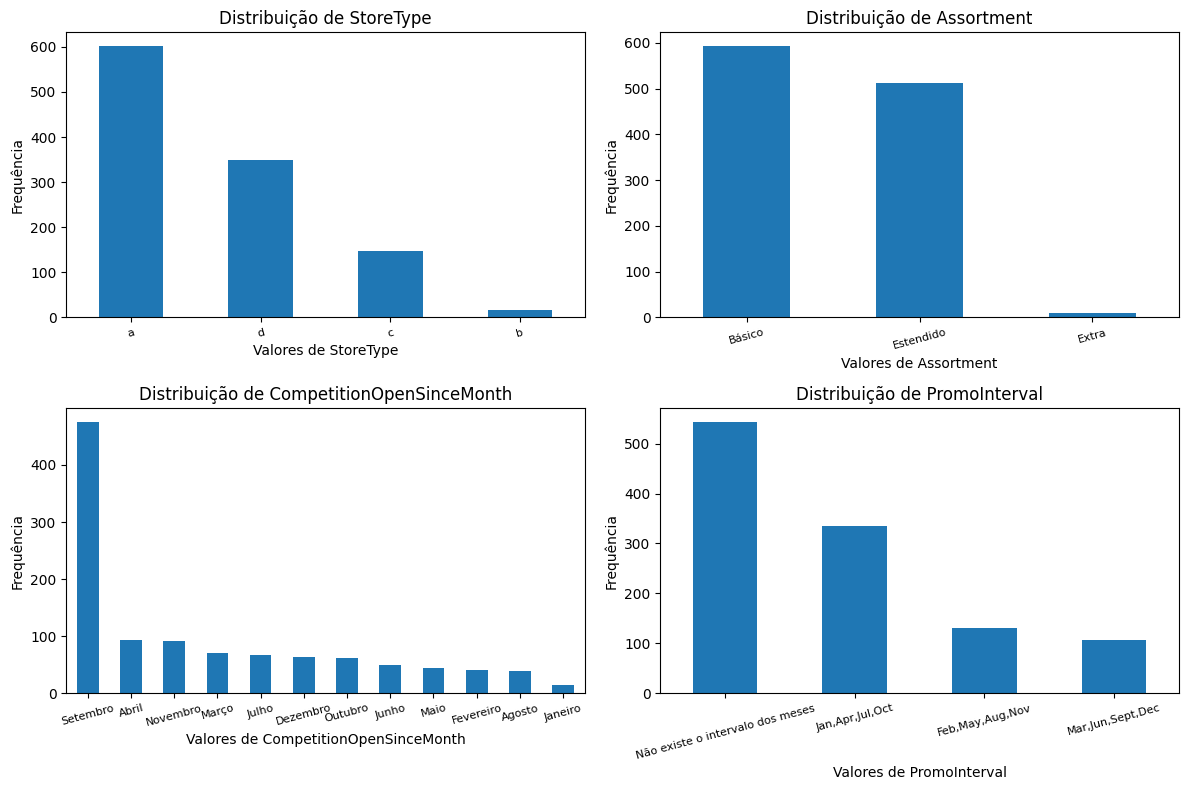

In [ ]:
# fazendo gráficos de barra para analisar outliers categóricos

plt.figure(figsize=(12, 8))
for i, column in enumerate(store_categ, 1):
    plt.subplot(2, 2, i)
    store_df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribuição de {column}')
    plt.xlabel(f'Valores de {column}')
    plt.ylabel('Frequência')
    plt.xticks(rotation=15, fontsize=8)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

A partir do gráfico, podemos perceber que:
1. Na coluna de "StoreType" as lojas do tipo 'b' são as que possuem menos representantes.
2. Na coluna de "Assortment", as unidades que possuem um nível de sortimento 'Extra' possuem menos representantes.
3. A imensa maioria das lojas competidoras foram abertas no mês de setembro.
4. Os valores da coluna de "PromoInterval" estão bem distribuídos mas possui como maioria o valor de "Não existe o intevalo entre os meses".

Com base nessa análise, não é interessante substituir esses valores categóricos por uma categoria à parte, como "Outros", e nem é interessante remover estes valores. Por isso, vamos deixar estes dados como estão.

## Train.csv

Vamos checar quais dados são mais distoantes dentro da base de dados "Train.csv" utilizando o método describe().

In [ ]:
# analisando medidas estatísticas da base de dados
train_df.describe().round(2)

,Store,Date,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,2014-04-11 01:30:42.846061824,5773.82,633.15,0.83,0.38,0.18
min,1.00,2013-01-01 00:00:00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2013-08-17 00:00:00,3727.00,405.00,1.00,0.00,0.00
50%,558.00,2014-04-02 00:00:00,5744.00,609.00,1.00,0.00,0.00
75%,838.00,2014-12-12 00:00:00,7856.00,837.00,1.00,1.00,0.00
max,1115.00,2015-07-31 00:00:00,41551.00,7388.00,1.00,1.00,1.00
std,321.91,NaN,3849.93,464.41,0.38,0.49,0.38


Com a função describe(), conseguimos obter algumas informações importantes, dentre estas informações estão o desvio-padrão, média, valor máximo e mínimo e informações sobre os quartis de cada coluna numérica.

A única coluna que percebe-se alguma informação um pouco estranha é a coluna de "Sales".

Na coluna de "Sales", percebe-se que o desvio-padrão se encontra um pouco elevado, com uma medida de desvio-padrão de aproximadamente 4 mil. Apesar disso, como se trata de uma coluna de vendas então esta medida pode estar correta pois as vendas de uma unidade podem variar bastante.

Além disso, vamos analisar mais profundamente a coluna de "Customers", pois ela é uma coluna muito importante para analisarmos e termos certeza de que não há valores que possam invalidar a análise.

Outra coluna que iremos analisar mais profundamente vai ser a coluna de "Dates", a fim de garantir que as datas não estão incorretas ou enviesadas.

As outras colunas possuem resultados esperados. A coluna de "Store" possui todos os valores de 1 à 1115, as colunas "Open", "Promo" e "SchoolHoliday" possui apenas os valores 0 e 1.

Dito isso, vamos analisar as colunas presentes na base de dados "Store.csv" em especial as colunas "Sales", "Customers" e "Date".

In [ ]:
# separando as colunas as quais iremos analisar os outliers
train_numeric = train_df.select_dtypes(include=['int64', 'float64']).columns
train_categ = train_df.select_dtypes(include=['object']).columns
train_data = ['Date']

### Colunas Numéricas

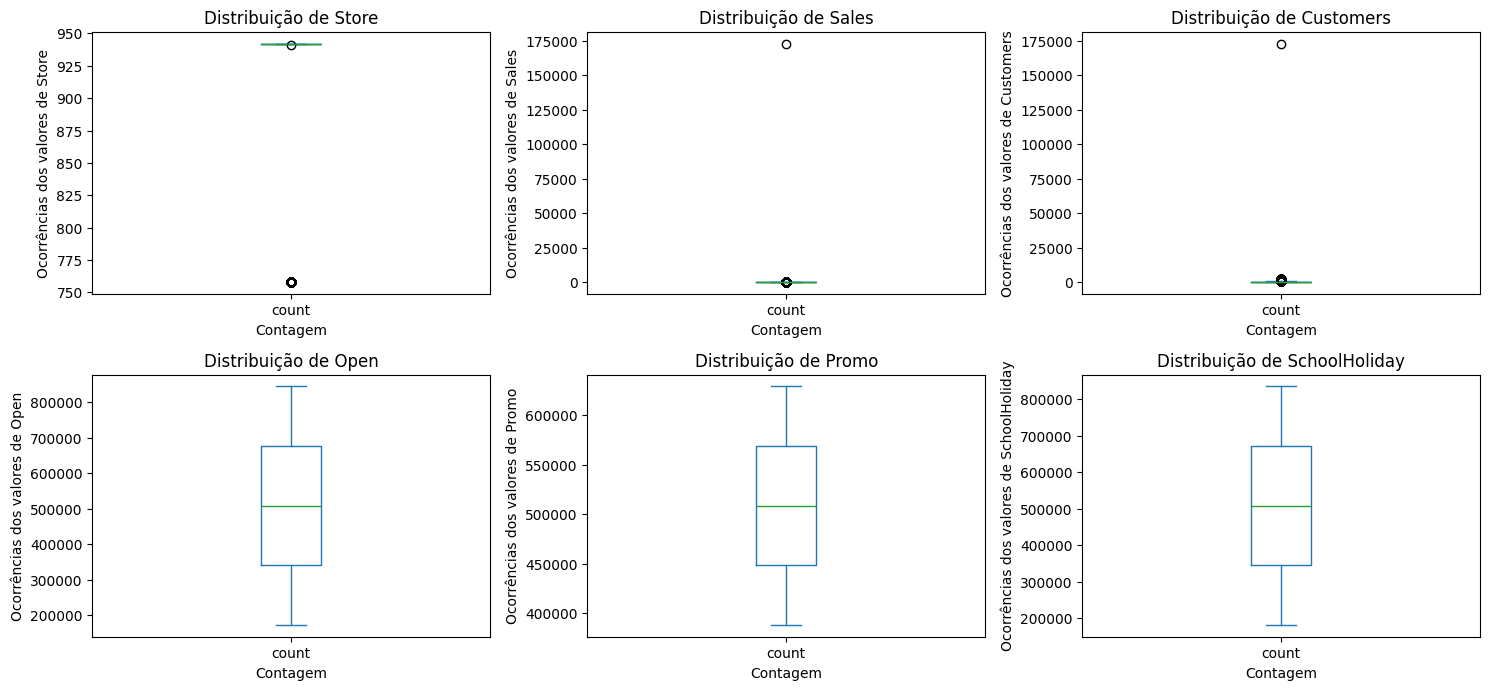

In [ ]:
# fazendo gráficos boxplots para analisar outliers numéticos

plt.figure(figsize=(15, 10))
for i, column in enumerate(train_numeric, 1):
    plt.subplot(3, 3, i)
    train_df[column].value_counts().plot(kind='box')
    plt.title(f'Distribuição de {column}')
    plt.xlabel(f'Contagem')
    plt.ylabel(f'Ocorrências dos valores de {column}')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

A partir dos gráficos, podemos perceber dois padrões nas colunas.

O primeiro padrão diz sobre as colunas "Open", "Promo" e "SchoolHoliday".

Os gráficos destas colunas possuem caixas altas, o que significa que os dados apresentam grande variabilidade de valores.

Estas caixas altas são críveis pois essas colunas possuem uma baixa gama de possíveis valores, causando uma alta variabilidade.

Por causa disso, os gráficos de caixa dessas colunas não possuem outliers identificados.

Portanto, podemos concluir que os valores presentes nas colunas "Open", "Promo" e "SchoolHoliday" são valores que condizem com o contexto delas. Agora vamos analisar o segundo padrão encontrado nestes gráficos

Já o segundo padrão diz sobre as colunas "Store", "Sales" e "Customers". Estas colunas possuem um outlier significativo que distoa bastante dos demais localizado na parte superior do gráfico.

Em relação à coluna "Store", o gráfico indica que os valores são encontrados em um único valor. Isto faz sentido pois esta coluna se trata de um identificador.

Em relação às colunas "Sales" e "Customers", podemos perceber que a maioria dos dados estão próximos ao limite inferior, logo, os valores típicos são muito baixos em relação aos outliers. Analisando o gráfico juntamente com a descrição dos dados, podemos perceber que as colunas "Sales" e "Customers" possuem muitas ocorrências do valor 0, podemos analisar futuramente o porquê destas várias ocorrências a fim de ajudar a otimização de vendas da Cerreira Fosta.

In [ ]:
imprimir_outliers(analisar_outliers_numericos, train_df, train_numeric)

Outliers da coluna Store: 



Outliers da coluna Sales: 

14050, 14051, 14052, 14053, 14054, 14055, 14056, 14057, 14058, 14059, 
14060, 14061, 14062, 14063, 14064, 14065, 14066, 14067, 14068, 14069, 
14070, 14071, 14072, 14073, 14074, 14075, 14076, 14077, 14078, 14079, 
14080, 14081, 14082, 14083, 14084, 14085, 14086, 14087, 14088, 14089, 
14090, 14091, 14092, 14093, 14094, 14095, 14096, 14097, 14098, 14099, 
14100, 14101, 14102, 14103, 14104, 14105, 14106, 14107, 14108, 14109, 
14110, 14111, 14112, 14113, 14114, 14115, 14116, 14117, 14118, 14119, 
14120, 14121, 14122, 14123, 14124, 14125, 14126, 14127, 14128, 14129, 
14130, 14131, 14132, 14133, 14134, 14135, 14136, 14137, 14138, 14139, 
14140, 14141, 14142, 14143, 14144, 14145, 14146, 14147, 14148, 14149, 
14150, 14151, 14152, 14153, 14154, 14155, 14156, 14157, 14158, 14159, 
14160, 14161, 14162, 14163, 14164, 14165, 14166, 14167, 14168, 14169, 
14170, 14171, 14172, 14173, 14174, 14175, 14176, 14177, 14178, 14179, 
14180, 14181, 14182

Utilizando a função qu definimos, podemos perceber duas coisas:
1. As colunas "Sales" e "Customers" possuem muitos outliers de acordo com o método interquartil.
2. As demais colunas ou não possuem outliers identificados ou possuem outliers identificados pelo método interquartil mas que na realidade não são outliers de fato.

Na coluna "Open" um outlier identificado foi o valor 0, mas este valor é um valor válido pela premissa da coluna. Logo, podemos concluir que a maioria das lojas esteve aberta durante os dias, o que já era algo percepitível.

Já na coluna "SchoolHoliday", um outlier identificado foi o valor 1, mas este valor é um valor válido pela premissa da coluna. Logo, podemos concluir que na maioria das lojas não fecharam por conta de feriados escolares, o que já era algo percepitível.

Portanto, vamos analisar mais profundamente os outliers das colunas "Sales" e "Customers" analisando quais são os valores dos outliers máximos e mínimos de cada coluna a fim de obter uma noção do intervalo considerado como outlier.


In [ ]:
# gerando os outliers da coluna "Sales" e mostrando o valor máximo e mínimo dos outliers
outlier_sales = analisar_outliers_numericos(train_df, 'Sales')
print(f"Menor valor de Sales: {outlier_sales[0]}")
print(f"Maior valor de Sales: {outlier_sales[-1]}")

# gerando os outliers da coluna "Customers" e mostrando o valor máximo e mínimo dos outliers
outlier_customers = analisar_outliers_numericos(train_df, 'Customers')
print(f"Menor valor de Customers: {outlier_customers[0]}")
print(f"Maior valor de Customers: {outlier_customers[-1]}")

Menor valor de Sales: 14050
Maior valor de Sales: 41551
Menor valor de Customers: 1486
Maior valor de Customers: 7388


De acordo os valores dos outliers mínimos e máximos das colunas "Sales" e "Customers" podemos perceber que estes valores são críveis e totalmente possíveis de serem reais. Por causa disso, não vamos retirá-los e nem substituí-los da base de dados.

### Colunas Categóricas

Vamos analisar quais são os diferentes valores presentes nas colunas categóricas da base "Store.csv"

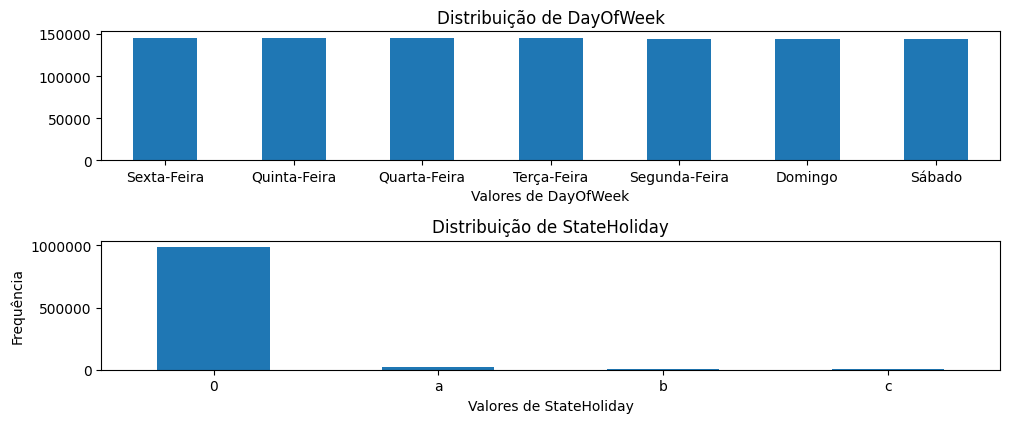

In [ ]:
# fazendo gráficos de barra para analisar outliers categóricos

plt.figure(figsize=(10, 6))
for i, column in enumerate(train_categ, 1):
    plt.subplot(3, 1, i)
    train_df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribuição de {column}')
    plt.xlabel(f'Valores de {column}')
    plt.xticks(rotation=0)

plt.gca().ticklabel_format(style='plain', axis='y')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.ylabel("Frequência")
plt.show()

De acordo com o gráfico de barra da coluna "DayOfWeek", os valores estão muito bem distribuídos, apresentando valores que fazem sentido com a proposta da coluna.

Com base no gráfico de barra da coluna "StateHoliday", podemos analisar que dentre os valores da coluna "StateHoliday" o valor que possui a maior quantidade de ocorrências é "Sem Feriado", o que faz bastante sentido.

Por isso, podemos concluir que as colunas "DayOfWeek" e "StateHoliday" não possuem nenhum outlier e portanto não precisamos realizar nenhum tipo de tratamento.

### Colunas de Data

In [ ]:
train_df['Date'].value_counts() # -> a coluna de maior valor é de 1115 e a de menor valor é de 935
# tem colunas de store que não estão sendo representadas todos os dias

,count
Date,
2015-07-31,1115
2013-11-06,1115
2013-11-18,1115
2013-11-17,1115
2013-11-16,1115
...,...
2014-10-28,935
2014-10-27,935
2014-10-26,935


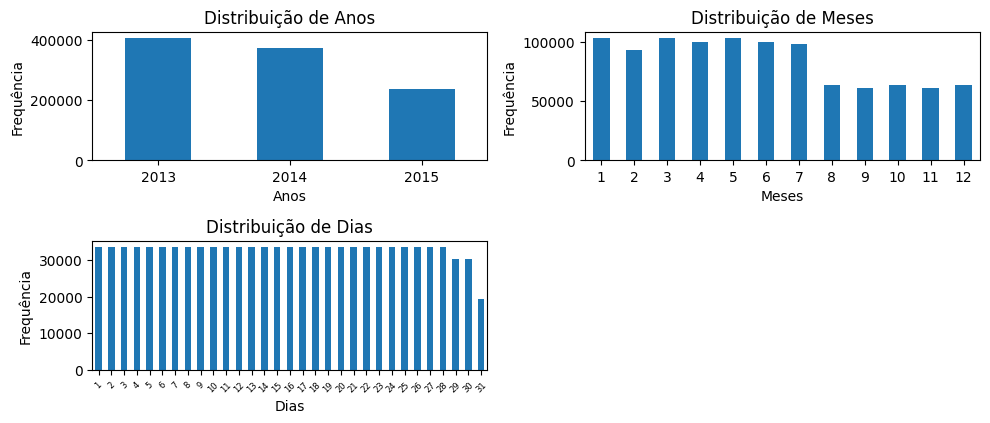

In [ ]:
# guardando os anos da coluna "Date" em ordem crescente
year_counts = train_df['Date'].dt.year.value_counts().sort_index()

# guardando os meses da coluna "Date" em ordem crescente
month_counts = train_df['Date'].dt.month.value_counts().sort_index()

# guardando os dias da coluna "Date" em ordem crescente
days_counts = train_df['Date'].dt.day.value_counts().sort_index()

# editando o tamanho do gráfico
plt.figure(figsize=(10, 6))

# plotando um gráfico de barras sobre a frequência dos anos
plt.subplot(3, 2, 1)
year_counts.plot(kind='bar')
plt.title(f'Distribuição de Anos')
plt.xlabel('Anos')
plt.ylabel('Frequência')
plt.xticks(rotation=0)

# plotando um gráfico de barras sobre a frequência dos meses
plt.subplot(3, 2, 2)
month_counts.plot(kind='bar')
plt.title(f'Distribuição de Meses')
plt.xlabel('Meses')
plt.ylabel('Frequência')
plt.xticks(rotation=0)

# plotando um gráfico de barras sobre a frequência dos dias
plt.subplot(3, 2, 3)
days_counts.plot(kind='bar')
plt.title(f'Distribuição de Dias')
plt.xlabel('Dias')
plt.ylabel('Frequência')
plt.xticks(rotation=45, fontsize=6)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

A partir dos gráficos gerados sobre os anos, meses e dias da coluna "Dates", podemos concluir que a frequência dos valores condizem com o esperado.

Na coluna dos anos, a coluna com menos frequência é o ano de 2015, pois de acordo com a base de dados o ano de 2015 possui ocorrências até julho.

Na coluna de meses, podemos observar que as colunas de agosto à dezembro possuem menos aparições que os demais meses. Isto pode ser explicado pois a nossa base de dados possuem datas a partir do dia 2013-01-01 até o dia 2015-07-31. Além disso, fevereiro possui um pouco menos de ocorrências pois ele possui menos dias em relação aos outros meses.

Na coluna de dias, podemos perceber que os dias 29, 30 e 31 possuem menos ocorrências. Isto pode ser explicado pois fevereiro possui normalmente 28 dias, logo, os dias 1 até o 28 irão possuir mais ocorrências.

Por fim, a partir das análises dos gráficos podemos perceber que a coluna de "Date" não possui dados distoantes nem enviesados, portanto podemos finalizar a parte de tratamento e remoção de outliers e partir para a etapa de integração dos dados e checagem de consistência.

## Conclusão

Agora, o próximo passo é realizar o merge entre as bases "Store" e "Train". Isso será feito utilizando a coluna Store, que é comum a ambas as bases e representa o identificador único de cada loja.

Essa união combinará as informações operacionais e de vendas (da base "Train") com os dados detalhados sobre as características das lojas (da base "Store"), permitindo uma análise mais completa e integrada.

# Integração dos dados e Checagem de Consistência
Após a remoção de outliers, devemos juntar as tabelas a fim de trabalhar com os dados unidos. Além disso, devemos checar se estes dados mergidos são consistentes, ou seja, se são coerentes e são de qualidade.

Concluímos o tratamento e a padronização da segunda base de dados fornecida pela Cerreira Fosta Ltda., a base "Train". Todas as colunas foram organizadas e transformadas para melhorar a clareza e facilitar a análise, garantindo que ambas as bases de dados estejam consistentes e prontas para serem utilizadas.

Agora, nosso próximo passo é a verificação e remoção de outliers com o intuito de remover ou modificar dados irreais e distoantes em nossa base de dados.

Primeiramente, vamos realizar a integração das bases "Store.csv" e "Train.csv" em um único DataFrame.



Vamos realizar essa união de bases com base na coluna "Store", que é uma coluna comum em ambas as bases de dados.

Essa união vai ser feita tomando como base a junção do tipo "inner", isso significa que apenas as linhas em que o valor da coluna "Store" é encontrado em ambos os DataFrames serão incluídos no DataFrame resultante.

In [ ]:
# Unindo as colunas com base na coluna "Store"
base_atualizada = pd.merge(train_df, store_df, on='Store', how='inner')

Após integrar das bases de dados "Store.csv" e "Train.csv", é preciso realizar uma validação para garantir a integridade e consistência dos dados.

Essa etapa de integração e validação da consistência dos dados tem como objetivo garantir que a junção foi realizada de forma correta e que os dados estão prontos para serem submetidos a análises.


Para esta etapa vamos fazer as seguintes validações:

1. Estrutura do DataFrame: Confirmar se o DataFrame obtido possui as colunas esperadas de ambos os DataFrames originais e se a quantidade de linhas é coerente com o tipo de junção realizada (inner join).

2. Checagem de Valores Ausentes: Verificar se não há novas ocorrências de dados faltantes.

3. Integridade Referencial: Garantir que a junção dos dados com base na coluna "Store" manteve as devidas informações de cada loja da base "Train.csv" combinadas com a base "Store.csv".

4. Coerência dos Dados: Analisar os dados em busca de inconsistências ou valores inesperados que possam ter surgido durante a integração.


Ao realizar essas validações, podemos ter maior confiança na qualidade e confiabilidade dos dados integrados no DataFrame resultante, garantindo que as análises e insights derivados sejam precisos e relevantes.

### Estrutura do DataFrame

Para checar a estrutura do DataFrame, vamos checar a quantidade de linhas e colunas.

In [ ]:
# analisando as (linhas, colunas) do DataFrame resultante
base_atualizada.shape

(1017209, 18)

A quantidade de linhas da base é igual à quantidade de linhas da base "Train.csv", o que é esperado pois realizamos a junção por inner join. Isso indica que todas as linhas de "Train.csv" encontraram correspondências em "Store.csv".

Agora vamos checar se a quantidade de colunas está de acordo com o esperado. Devemos somar as colunas das bases "Train.csv" e "Store.csv" e diminuir por uma unidade, já que em ambas as bases possuem a coluna "Store".

In [ ]:
# checando se a quantidade de colunas é a quantidade esperada
if base_atualizada.shape[1] == train_df.shape[1] + store_df.shape[1] - 1:
    print("A quantidade de colunas está de acordo com o esperado.")

A quantidade de colunas está de acordo com o esperado.


Como visto acima, a quantidade de colunas está de acordo com o esperado.

Portanto, podemos seguir para a checagem de valores ausentes.

### Checagem de Valores Ausentes

Vamos fazer a checagem de novas ocorrências de valores nulos após a junção da bases de dados.

In [ ]:
# checando informações da nova base
base_atualizada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  object        
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

Percebe-se que as únicas colunas que possuem valores nulas são as colunas de "CompetitionDistance", "Promo2SinceWeek" e "Promo2SinceYear". Estas colunas são as que justamentes deixamos com ocorrências nulas de propósito, já que fazia mais sentido com a proposta.

Portanto, podemos concluir que não há novas ocorrências de valores nulos no novo DataFrame.

Podemos seguir com a próxima etapa da validação de integridade referencial.

### Integridade Referencial

Vamos checar como as colunas estão dispostas na base de dados obtida.

In [ ]:
# checando as 5 primeiras linhas da base
base_atualizada.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,Sexta-Feira,2015-07-31,5263,555,1,1,0,1,c,Básico,1270.0,Setembro,2008.0,0,NaN,NaN,Não existe o intervalo dos meses
1,2,Sexta-Feira,2015-07-31,6064,625,1,1,0,1,a,Básico,570.0,Novembro,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,Sexta-Feira,2015-07-31,8314,821,1,1,0,1,a,Básico,14130.0,Dezembro,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,Sexta-Feira,2015-07-31,13995,1498,1,1,0,1,c,Estendido,620.0,Setembro,2009.0,0,NaN,NaN,Não existe o intervalo dos meses
4,5,Sexta-Feira,2015-07-31,4822,559,1,1,0,1,a,Básico,29910.0,Abril,2015.0,0,NaN,NaN,Não existe o intervalo dos meses


As informações advindas da junção estão dispostas como o esperado.

Agora, é necessário verificar se a junção dos dados com base na coluna "Store" manteve as devidas informações de cada loja da base "Train.csv" e "Store.csv".

In [ ]:
# pegando a quantidade de valores diferentes na coluna "Store" da base "Store.csv"
print(f"Valores diferentes na base \"Store.csv\": {store_df['Store'].value_counts().shape[0]}")

# pegando a quantidade de valores diferentes na coluna "Store" da base "Train.csv"
print(f"Valores diferentes na base \"Train.csv\": {store_df['Store'].value_counts().shape[0]}")

# pegando a quantidade de valores diferentes na coluna "Store" da base "Store.csv"
print(f"Valores diferentes na base unida: {store_df['Store'].value_counts().shape[0]}")

Valores diferentes na base "Store.csv": 1115
Valores diferentes na base "Train.csv": 1115
Valores diferentes na base unida: 1115


Como todas as bases de dados possuem a mesma quantidade de valores da coluna "Store", podemos concluir que a base unida manteve as devidas informações de cada loja da base "Train.csv" combinadas com a base "Store.csv".

Portanto, podemos ir para a última etapa de integração dos dados e checagem de consistência.

### Coerência dos Dados

Primeiro, vamos verificar se os tipos de dados das colunas permaneceram consistentes.

In [ ]:
# checando os tipos das colunas da base unida
base_atualizada.dtypes

,0
Store,int64
DayOfWeek,object
Date,datetime64[ns]
Sales,int64
Customers,int64
Open,int64
Promo,int64
StateHoliday,object
SchoolHoliday,int64
StoreType,object


Os tipos de cada coluna permaneceram consistentes.

Agora, vamos checar se há dados duplicados na base de dados unida.

In [ ]:
# checando quandos dados duplicados existem
base_atualizada.duplicated().sum()

0

Não há dados duplicados, logo não precisamos fazer nenhum tratamento em relação à isso.

### Salvando a base de dados unida

Checamos a base de dados unida e ela apresenta integridade referencial e é uma base de dados consistente.

Com isso, vamos salvar esta base de dados para futuras análises estatísticas.

In [ ]:
# salvando a base de dados ignorando o índice
base_atualizada.to_parquet('/content/drive/MyDrive/Pasta_PTA/base_atualizada.parquet', index=False)